# Graphics.

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from numpy import (
    array,
    column_stack,
    dot,
    hstack,
    logical_and,
    mean,
    ones,
    sqrt,
    squeeze,
    var,
    zeros,
)
from numpy.linalg import lstsq

# Loading and transforming the data
sp500_data = pd.read_csv("sp500.csv", index_col="Date", parse_dates=True)
ftse_data = pd.read_csv("ftse.csv", index_col="Date", parse_dates=True)
sp500 = sp500_data["Adj Close"]
sp500_dates = sp500_data.index
ftse = ftse_data["Adj Close"]
ftse_dates = ftse_data.index

## Exercise 1


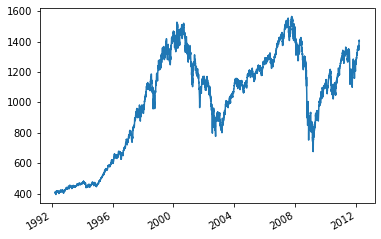

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sp500_dates, sp500)
fmt = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(fmt)
fig.autofmt_xdate()
plt.draw()

## Exercise 2


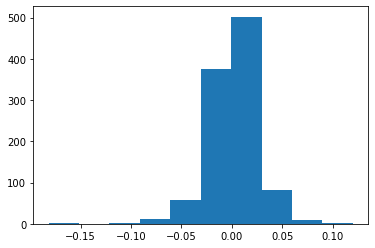

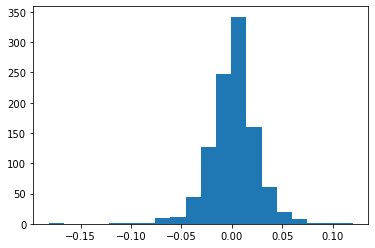

In [3]:
sp500_rets = sp500.resample("W-FRI").last().pct_change().dropna()
ftse_rets = ftse.resample("W-FRI").last().pct_change().dropna()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(sp500_rets)
plt.draw()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(sp500_rets, bins=20)
plt.draw()

## Exercise 3


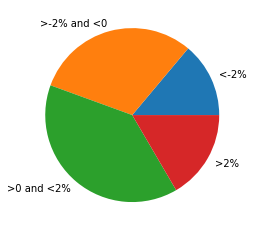

In [4]:
bands = [(-1.0, -0.02), (-0.02, 0.0), (0.0, 0.02), (0.02, 1.0)]
percs = zeros(len(bands))
i = 0
for b in bands:
    percs[i] = mean(logical_and(sp500_rets > b[0], sp500_rets <= b[1]))
    i += 1
fig = plt.figure()
ax = fig.add_subplot(111)
labels = ["<-2%", ">-2% and <0", ">0 and <2%", ">2%"]
ax.pie(percs, labels=labels)
plt.draw()

## Exercise 4


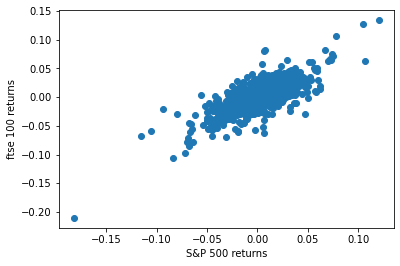

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(sp500_rets, ftse_rets)
ax.set_xlabel("S&P 500 returns")
ax.set_ylabel("ftse 100 returns")
plt.draw()

## Exercise 5


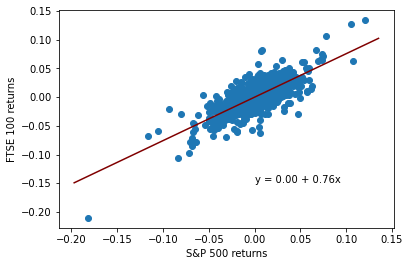

In [6]:
x = column_stack((ones(sp500_rets.shape), sp500_rets))
y = column_stack((ftse_rets,))
x, y
out = lstsq(x, y, rcond=None)
b = out[0]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(sp500_rets, ftse_rets)
ax.set_xlabel("S&P 500 returns")
ax.set_ylabel("FTSE 100 returns")
x = ax.get_xlim()
x = array(x)
x.shape = -1, 1
x = hstack((ones(x.shape), x))
fit = dot(x, b)
b = squeeze(b)
ax.plot(x[:, 1], fit, color="#800000")
ax.text(0, -0.15, f"y = {b[0]:0.2f} + {b[1]:0.2f}x")
plt.draw()

## Exercise 6


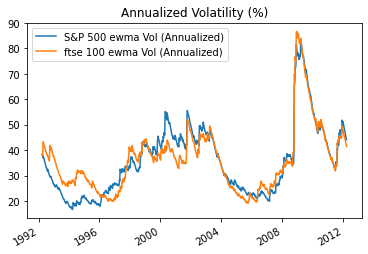

In [7]:
T = sp500_rets.size
ewma = zeros((T, 2))
r = column_stack((sp500_rets, ftse_rets))
ewma[0] = var(r, axis=0)
for i in range(1, T):
    ewma[i] = 0.97 * ewma[i - 1] + 0.03 * r[i - 1] ** 2
ewma = 100 * sqrt(252 * ewma)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sp500_rets.index, ewma[:, 0], label="S&P 500 ewma Vol (Annualized)")
ax.plot(ftse_rets.index, ewma[:, 1], label="ftse 100 ewma Vol (Annualized)")
ax.legend(loc=0)
ax.set_title("Annualized Volatility (%)")
fmt = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(fmt)
fig.autofmt_xdate()
plt.show()